In [2]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.3 MB/s eta 0:00:00


In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


Recommended discount: 35.74%


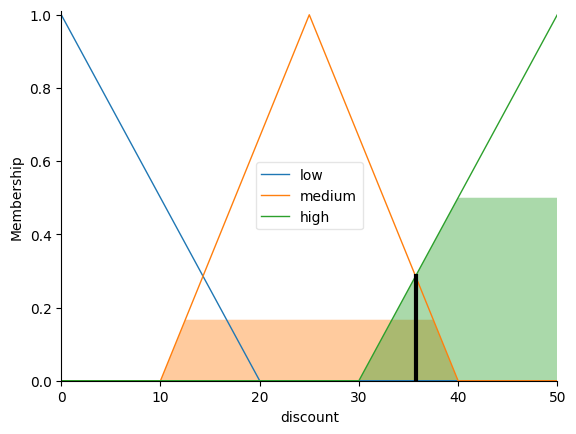

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the input variables
purchase_amount = ctrl.Antecedent(np.arange(0, 1001, 1), 'purchase_amount')
customer_frequency = ctrl.Antecedent(np.arange(0, 31, 1), 'customer_frequency')

# Define the output variable
discount = ctrl.Consequent(np.arange(0, 51, 1), 'discount')

# Define membership functions for purchase amount
purchase_amount['low'] = fuzz.trimf(purchase_amount.universe, [0, 0, 500])
purchase_amount['medium'] = fuzz.trimf(purchase_amount.universe, [200, 500, 800])
purchase_amount['high'] = fuzz.trimf(purchase_amount.universe, [500, 1000, 1000])

# Define membership functions for customer frequency
customer_frequency['rare'] = fuzz.trimf(customer_frequency.universe, [0, 0, 10])
customer_frequency['occasional'] = fuzz.trimf(customer_frequency.universe, [5, 15, 25])
customer_frequency['frequent'] = fuzz.trimf(customer_frequency.universe, [20, 30, 30])

# Define membership functions for discount
discount['low'] = fuzz.trimf(discount.universe, [0, 0, 20])
discount['medium'] = fuzz.trimf(discount.universe, [10, 25, 40])
discount['high'] = fuzz.trimf(discount.universe, [30, 50, 50])

# Define fuzzy rules
rule1 = ctrl.Rule(purchase_amount['low'] & customer_frequency['rare'], discount['low'])
rule2 = ctrl.Rule(purchase_amount['low'] & customer_frequency['occasional'], discount['low'])
rule3 = ctrl.Rule(purchase_amount['low'] & customer_frequency['frequent'], discount['medium'])
rule4 = ctrl.Rule(purchase_amount['medium'] & customer_frequency['rare'], discount['low'])
rule5 = ctrl.Rule(purchase_amount['medium'] & customer_frequency['occasional'], discount['medium'])
rule6 = ctrl.Rule(purchase_amount['medium'] & customer_frequency['frequent'], discount['high'])
rule7 = ctrl.Rule(purchase_amount['high'] & customer_frequency['rare'], discount['medium'])
rule8 = ctrl.Rule(purchase_amount['high'] & customer_frequency['occasional'], discount['high'])
rule9 = ctrl.Rule(purchase_amount['high'] & customer_frequency['frequent'], discount['high'])

# Create control system and simulation
discount_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
discount_simulation = ctrl.ControlSystemSimulation(discount_ctrl)

# Example usage: setting input values
discount_simulation.input['purchase_amount'] = 750
discount_simulation.input['customer_frequency'] = 20

# Compute the result
discount_simulation.compute()

# Print the result
print(f"Recommended discount: {discount_simulation.output['discount']:.2f}%")

# Visualize the result
discount.view(sim=discount_simulation)
